In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas_datareader.data as web
import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split





In [0]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2019,11,29)

In [0]:
df = web.DataReader("TLKM.JK",'yahoo',start,end)

In [278]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-25,4070.0,3940.0,4070.0,3950.0,107581200.0,3950.0
2019-11-26,3960.0,3860.0,3950.0,3860.0,281002600.0,3860.0
2019-11-27,3930.0,3800.0,3870.0,3880.0,97511300.0,3880.0
2019-11-28,3900.0,3800.0,3830.0,3820.0,70635000.0,3820.0
2019-11-29,3950.0,3840.0,3860.0,3930.0,72146900.0,3930.0


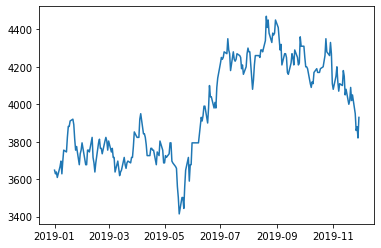

In [279]:
plt.plot(df['Adj Close']) # melihat Trend nilai sahamnya apakah lagi naik atau turun

In [0]:
# membuat rumus untuk menambahkan hasil perhitungan ke tabel
dfreg = df.loc[:,['Adj Close','Volume']]
# HL PCT adalah High & Low Percentage
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
# PCT CHange adalah perubahan persentase
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] *100.0

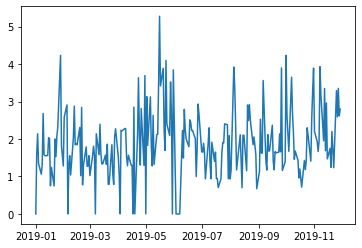

In [281]:
plt.plot(dfreg['HL_PCT'])

In [0]:
# drop missing value
dfreg = dfreg.dropna()

In [0]:
# forecasting perseminggu
forecast_out = 7  # 7 days

In [284]:
dfreg['label'] = dfreg['Adj Close'].shift(-forecast_out)
# akan muncul kolom baru bernama label merupakan hasil nilai saham 7 hari kedepan
dfreg.head(15)

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2019-01-01,3648.120361,0.0,0.000000,0.000000,3696.761963
2019-01-02,3628.663574,31355300.0,1.608579,-0.533333,3755.131836
2019-01-03,3638.392090,83842400.0,2.139037,0.808625,3745.403564
2019-01-04,3609.207031,73936900.0,1.347709,0.542005,3823.229980
2019-01-07,3667.576904,83678100.0,1.061008,0.265957,3881.600098
2019-01-08,3696.761963,67963700.0,1.315789,0.795756,3881.600098
2019-01-09,3628.663574,98529400.0,2.680965,-2.356021,3910.784912
2019-01-10,3696.761963,126396700.0,1.578947,1.063830,3920.513184
2019-01-11,3755.131836,116753700.0,1.554404,1.047120,3891.328369


In [0]:
X = np.array(dfreg.drop(['label'],1)) # X adalah nilai dfreg tanpa kolom label

In [0]:
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [0]:
y = np.array(dfreg['label']) # y adalah nilai dfreg dengan kolom label
y = y[:-forecast_out]

In [0]:
# membuat data train
X_train = X
y_train = y

# split data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 20 )

In [289]:
# menggunakan linear regression
clfreg = LinearRegression()
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
clf = clfreg

In [291]:
clf.predict(X_lately) # predict 7 periode kedepan

array([4025.91711932, 4043.27843155, 3990.05939846, 3936.78168364,
       3893.41339193, 3843.6455213 , 3918.51986284])

In [0]:
forecast_set = clf.predict(X_lately)
dfreg['Forecast'] = np.nan

In [0]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1) # untuk nambah 1 hari (besoknya)

In [0]:
for i in forecast_set:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)] + [i]

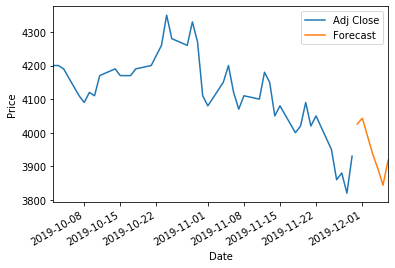

In [295]:
dfreg['Adj Close'].tail(50).plot()
dfreg['Forecast'].tail(50).plot()
plt.legend(loc=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [0]:
# moving average
close_px = df['Adj Close']
# window = days
mavg = close_px.rolling(window=30).mean()
mavg2 = close_px.rolling(window=100,center=True).mean()

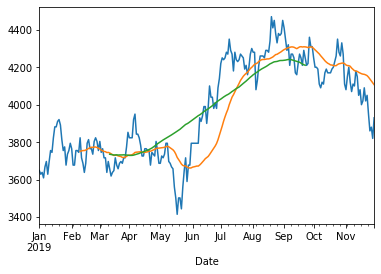

In [297]:
close_px.plot()
mavg.plot()
mavg2.plot()

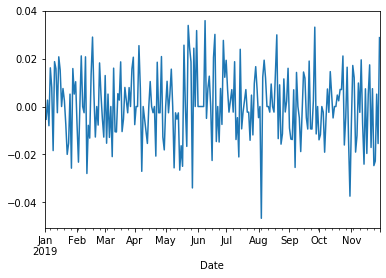

In [298]:
# return
rets = close_px / close_px.shift(1) - 1
rets.plot()

In [0]:
# membandingkan dengan nilai saham perusahaan lain
dfcomp = web.DataReader(['AALI.JK', 'BBCA.JK', 'AUTO.JK', 'BBRI.JK', 'KLBF.JK'], 'yahoo', start, end)['Adj Close']

In [300]:
dfcomp = dfcomp.dropna()  # untuk menghilangkan nilai yang tidak ada dari perhitungan
dfcomp.tail()

Symbols,AALI.JK,BBCA.JK,AUTO.JK,BBRI.JK,KLBF.JK
Date,,,,,
2019-11-25,13200.0,31375.0,1240.0,4130.0,1515.0
2019-11-26,13000.0,31425.0,1240.0,4150.0,1530.0
2019-11-27,12125.0,31500.0,1205.0,4170.0,1515.0
2019-11-28,12275.0,31250.0,1175.0,4050.0,1485.0
2019-11-29,12600.0,31400.0,1195.0,4090.0,1525.0


In [0]:
retscomp = dfcomp.pct_change() # perubahan nilai
corr = retscomp.corr() # korelasinya

In [302]:
corr

Symbols,AALI.JK,BBCA.JK,AUTO.JK,BBRI.JK,KLBF.JK
Symbols,,,,,
AALI.JK,1.000000,0.095096,0.069687,0.138628,0.112020
BBCA.JK,0.095096,1.000000,0.257307,0.366057,0.475444
AUTO.JK,0.069687,0.257307,1.000000,0.300720,0.109623
BBRI.JK,0.138628,0.366057,0.300720,1.000000,0.283585
KLBF.JK,0.112020,0.475444,0.109623,0.283585,1.000000


([<matplotlib.axis.YTick at 0x7f37a03d1710>,
 <a list of 5 Text yticklabel objects>)

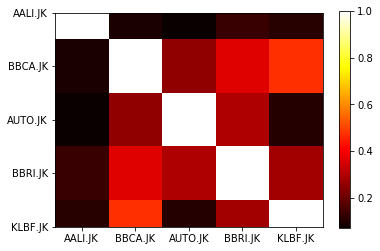

In [303]:
plt.imshow(corr, cmap='hot', interpolation=None)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

In [0]:
# stock prediction
